# Cardio Good Fitness Project 

## Objective

After exploring the dataset to identify differences between the customers of each product, we need to find relationship between the different characteristics of the customers. 

## Key Questions
1. What the characteristics (age, gender, marital status, income, and education) of customers who use the tredmills more often? 
2. Which model is most sold one?
3. Which model do the customers run more miles at?
4. Which model do high-income customers most purchase?
5. Which model gives the highest fitness rate?

## Data Description:

The data is about customers of the tredmill products of a retail store called Cardio Good Fitness. It contains the following variables:
1. **Product** - The model number of the tredmill
2. **Age** - Age of the customer in number of years
3. **Gender** - Gender of the customer
4. **Education** - Education of the customer in number of years
5. **MaritalStatus** - Marital status of the customer
6. **Usage** - Average number of times the customer wants to use the tredmill every week
7. **Fitness** - Self rated fitness score of the customers (5 - very fit, 1 - very unfit)
8. **Income** - Income of the customer
9. **Miles** - Miles that a customer expects to run

## Importing the necessary libraries

In [1]:
#Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

#Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset

In [2]:
data = pd.read_csv('CardioGoodFitness.csv')

In [3]:
# copying data to another variable to avoid any changes to original value
df = data.copy()

In [4]:
#looking at head (10 rows)
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


In [5]:
# checking shape of the data
df.shape

(180, 9)

The dataset has 180 rows and 9 columns. There are 180 customers. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


- There is no missing value in all columns.
- There are 6 numerical columns and 3 object type columns.


In [7]:
#Getting the statistical summary for the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


- The youngest age is 18, the oldest is 50, and the average age is 29.
- The average usage of the tredmills per week is 3 times.
- The average income of the customers is \$53,720.
- The average miles the customers run per week is 103.19 miles.
- Education years span from 12 to 21.
- The average fitness rate is 3.3, the lowest fit is 1 (very unfit) and the highest fit (very fit) is 5.

In [8]:
# What kind of models are there?
df['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

**There are 3 types of tredmills: TM195, TM498, and TM798.**

<AxesSubplot:xlabel='Product', ylabel='count'>

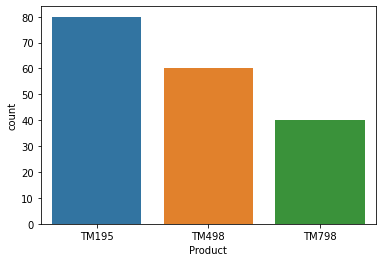

In [9]:
sns.countplot(data=df,x='Product')

In [83]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

- TM195 model is the most popular. 80 of them were sold.

In [11]:
df[['MaritalStatus','Gender']].value_counts()

MaritalStatus  Gender
Partnered      Male      61
               Female    46
Single         Male      43
               Female    30
dtype: int64

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

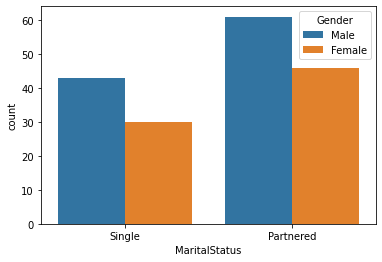

In [32]:
sns.countplot(data=df,x='MaritalStatus', hue='Gender')

- 107 customers are partnered while 73 of them are single.
- 104 of them are male and 76 are female.

**First of all, let's look at the correlations between numerical attributes!!**

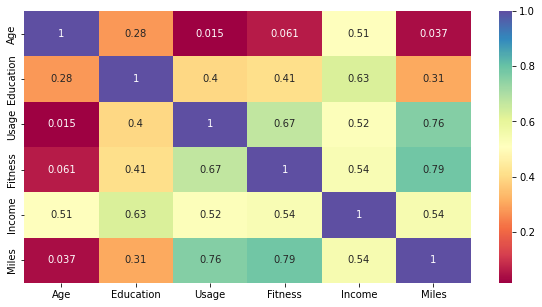

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot = True, cmap='Spectral')
plt.show()

- As expected, Fitness shows high correlation with Miles and Usage. The more miles run, the more get fitness.
- Income and education have a high correlation. Income and age are somewhat correlated.
- We can analyze by grouping certain correlated numerical attributes. 

### The customers who purchased TM195

In [13]:
def histogram_boxplot(data, feature, figsize=(8, 6), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

In [14]:
# Statistics about the customers who purchased TM195
df[df['Product']=='TM195'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


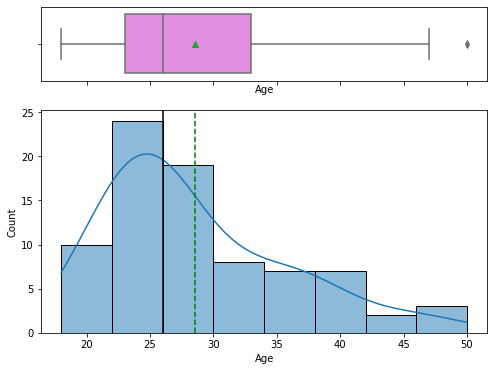

In [15]:
histogram_boxplot(df[df['Product']=='TM195'],'Age',kde=True)

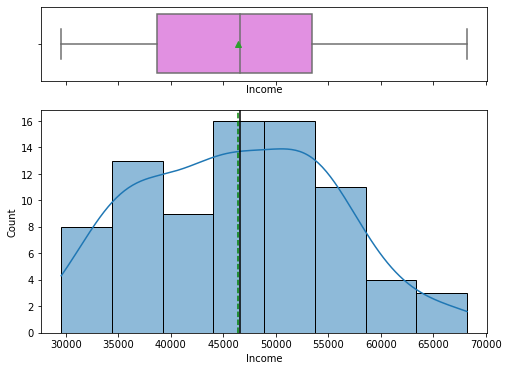

In [16]:
histogram_boxplot(df[df['Product']=='TM195'],'Income',kde=True)

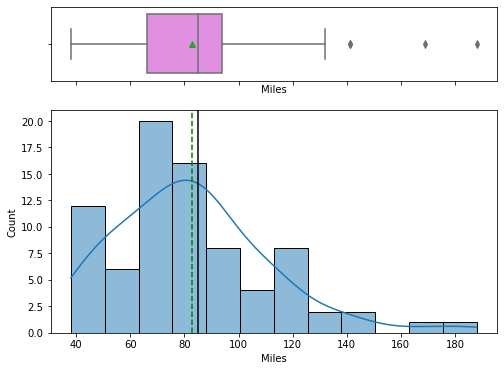

In [17]:
histogram_boxplot(df[df['Product']=='TM195'],'Miles',kde=True)

- The average age of the customers who purchased TM195 is 29, and the age distribution is right skewed.
- The average income of the customer who purchased TM195 is $46,418, and the income distribution is slightly right skewed. 
- They run average 83 miles per week.

## The customers who purchased TM498

In [18]:
# Statistics about the customers who purchased TM498
df[df['Product']=='TM498'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


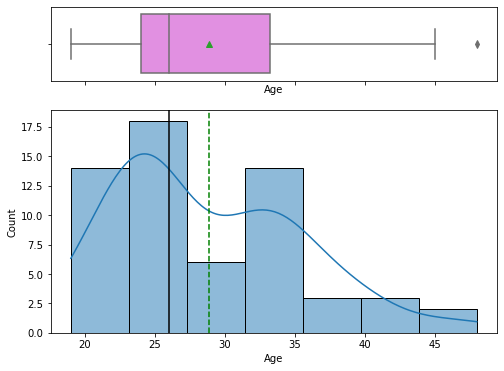

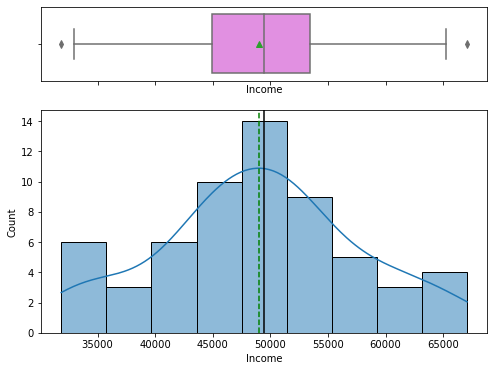

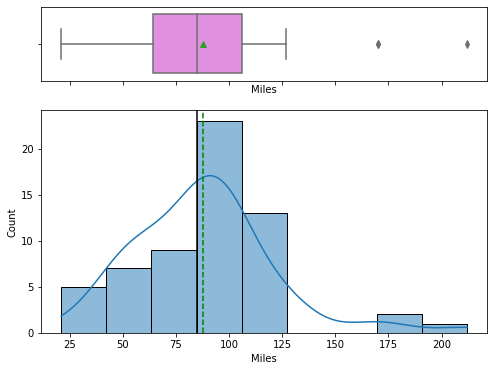

In [19]:
histogram_boxplot(df[df['Product']=='TM498'],'Age',kde=True)
histogram_boxplot(df[df['Product']=='TM498'],'Income',kde=True)
histogram_boxplot(df[df['Product']=='TM498'],'Miles',kde=True)

- The average age of the customers who purchased TM498 is 29, and the age distribution is right skewed.
- The average income of the customer who purchased TM498 is $48,973, and the income distribution is almost bell-curved. 
- They run average 88 miles per week. There are some upper outliers.

## The customers who purchased TM798

In [20]:
# Statistics about the customers who purchased TM498
df[df['Product']=='TM798'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


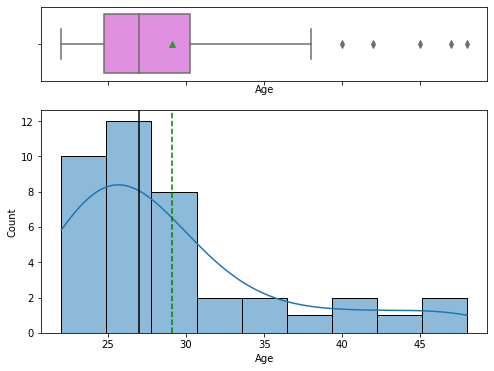

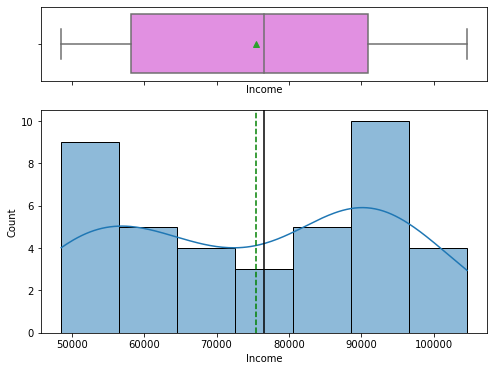

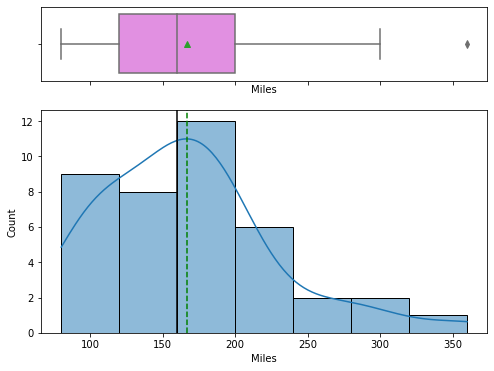

In [21]:
histogram_boxplot(df[df['Product']=='TM798'],'Age',kde=True)
histogram_boxplot(df[df['Product']=='TM798'],'Income',kde=True)
histogram_boxplot(df[df['Product']=='TM798'],'Miles',kde=True)

- The average age of the customers who purchased TM798 is 29. However, the average income of them is $75441 which is very high compared to customers of TM195 and TM498. The average mile they run per week is 167 miles.

## Bivariate Analysis

<AxesSubplot:xlabel='Fitness', ylabel='count'>

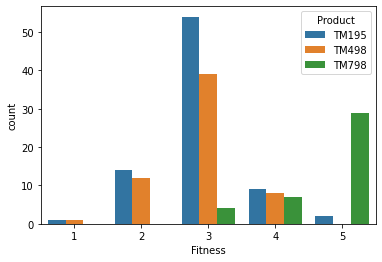

In [22]:
sns.countplot(data= df,x='Fitness',hue='Product')

- **Customers who bought TM798 showed the highest fits.**

<AxesSubplot:xlabel='Income', ylabel='Usage'>

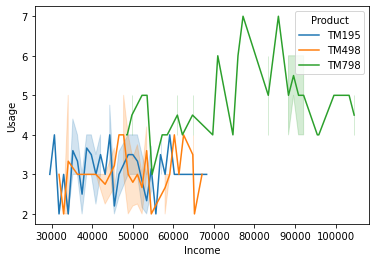

In [69]:
sns.lineplot(data=df,x='Income',y='Usage',hue='Product')

- **High-income customers purchased TM798 and their usages of tredmills are also highest.**

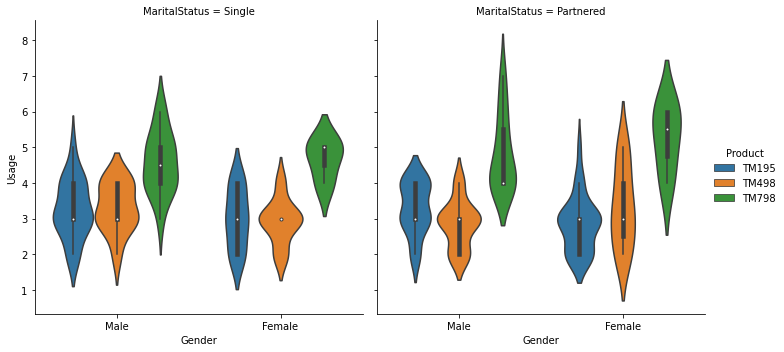

In [77]:
sns.catplot(data=df, x='Gender', y='Usage',kind='violin',col='MaritalStatus', hue='Product')

* Although TM195 users showed more usages, usages seem to not depend on genders and marital status.

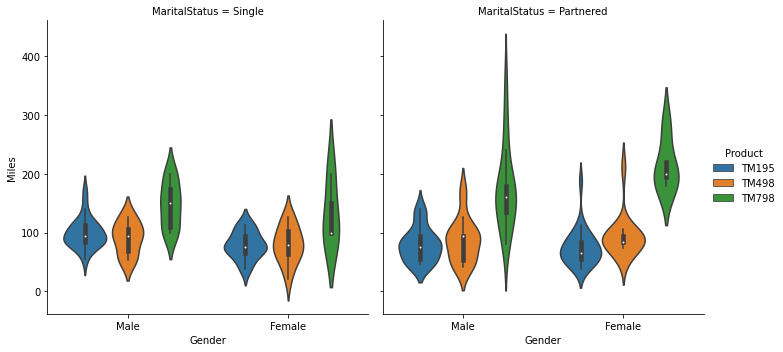

In [78]:
sns.catplot(data=df, x='Gender', y='Miles',kind='violin',col='MaritalStatus', hue='Product')

* TM195 users ran more miles, and partnered customers ran more.

## Summary

- TM195 is the best selling model, and most high-income customers bought TM798.
- More male customers purchased tredmills than female ones.
- More partnered customers purchased tredmills than single ones.
- TM798 users run most miles, get highest usages, and get more fits.
- Genders and marital status do not affect prefereces of any models.

## Recommendations

- TM195 is most popular. We should increase production of TM195.
- TM798 is luxury model. For targetting high-income customers, we should add more luxury options.

## Suggested Future Analysis